# Introduction

#### As ISIS has been pushed back from the territories they earned, other groups (some associated with ISIS) have moved on to different different countries and different continents. One of the continents that has had an influx in terrorist activity over the years is Africa. New branches of ISIS, Al-Qaida and new islamic terrorist groups have been formed and have been increasing in attacks and numbers. They have learned from the examples set by the Islamic terrorist groups based in the Middle East, and are improving their techniques. Determining the effectiveness of certain groups and their areas can be used to aid in determining how much of a threat they will pose into the future, without more intervention.

# Questions

### The questions that will be answered at the end of this report include:
* Which countries have the highest average in terrorist incidents from 2010 - 2018 (most recent available data)?
* Are terrorist groups in Africa becoming more aggressive compared to their Middle Eastern counterparts?
* What is the likelihood that African terrorist groups will increase in terrorist incidents and deaths without more intervention?


# Data

#### The data used in this came from the GTD (Global Terrorism Database) from the University of Maryland: Study of Terrorism and Responses to Terrorism (START)
#### Due to the large amount of Islamic terrorist groups within the areas, the data has been condensed to include only the more reputable and violent terrorist groups in these regions, which include: Taliban, ISGS, ISIS, AQIM,Al-Qaida.
#### The below dataframe is to show the data that will be used in this report. In order to compare the countries in highest perecentage of increases in incidents, data from each country leveraged against the incidents over the years available to determine the percentage increase.
#### Determining the effectiveness of certain groups and their areas can be used to determine how much of a threat they will pose into the future.
#### Taking the countries listed below and combining them with the specific groups with the deaths to incidents to come up with the result of the groups and their counterparts' 'aggressivness'. For example, taking ISGS (Islamic state in the Greater Sahara) compared with the incidents with ISI/ISIL (Islamic state in iraq and Islamic state of Iraq and the Levant). ISI and ISIL are the same group, but their ISI became ISIL as they gained more territory, ISIS is also the same group for reference.
#### Comparing all of the incidents and deaths by region, and groups that occupy their regions, to determine which regions (Sub-Saharan Africa, South Asia, Middle East, North Africa) are becoming more violent  

In [116]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import types
import pandas as pd
from botocore.client import Config 
import ibm_boto3
import numpy as np

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_72664cce2b4d4fb3b27854367823008f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='beo4TntZ11cb4BzIq2GELDgYxx_xof62j_8R2_cc-l9p',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_72664cce2b4d4fb3b27854367823008f.get_object(Bucket='capstonedsproject-donotdelete-pr-fmytwfnljpwzts',Key='capstone_ds_coursera.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,eventid,iyear,imonth,iday,country_txt,region,region_txt,city,latitude,longitude,attacktype1_txt,gname,nkill
0,201001010002,2010,1,1,Afghanistan,6,South Asia,Dwah Mande,33.469444,69.620278,Bombing/Explosion,Taliban,4.0
1,201001100001,2010,1,10,Afghanistan,6,South Asia,Dawlatabad,36.420551,64.893890,Bombing/Explosion,Taliban,4.0
2,201001160003,2010,1,16,Afghanistan,6,South Asia,NaN,36.079561,64.905955,Hostage Taking (Kidnapping),Taliban,0.0
3,201001170001,2010,1,17,Afghanistan,6,South Asia,NaN,34.176874,61.700565,Assassination,Taliban,6.0
4,201001180004,2010,1,18,Afghanistan,6,South Asia,Jalalabad,34.417122,70.449593,Bombing/Explosion,Taliban,0.0


In [10]:
df_data_1.count()

eventid            14124
iyear              14124
imonth             14124
iday               14124
country_txt        14124
region             14124
region_txt         14124
city               14095
latitude           14072
longitude          14072
attacktype1_txt    14124
gname              14124
nkill              13121
dtype: int64

# Highest Percentage increase of terrorist incidents from 2010-2018 by country

In [11]:
import seaborn as sns

In [12]:
percentage = df_data_1.drop(columns=['eventid','iday','region','region_txt', 'city', 'latitude', 'longitude', 'attacktype1_txt', 'gname','nkill'])
percentage.head()

,iyear,imonth,country_txt
0,2010,1,Afghanistan
1,2010,1,Afghanistan
2,2010,1,Afghanistan
3,2010,1,Afghanistan
4,2010,1,Afghanistan


In [14]:
attacks = percentage.groupby(['iyear', 'country_txt'])['country_txt'].count().unstack(fill_value=0)
attacks

country_txt,Afghanistan,Algeria,Bahrain,Burkina Faso,Egypt,Georgia,Iran,Iraq,Israel,Ivory Coast,...,Pakistan,Saudi Arabia,Somalia,Syria,Tajikistan,Tunisia,Turkey,Turkmenistan,West Bank and Gaza Strip,Yemen
iyear,,,,,,,,,,,,,,,,,,,,,
2010,302,13,0,0,0,0,0,46,0,0,...,7,0,0,0,0,0,0,0,0,0
2011,203,7,0,0,0,0,0,4,0,0,...,12,0,0,0,0,2,0,0,0,0
2012,793,8,0,0,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,0,0
2013,773,8,0,0,0,0,0,341,0,0,...,2,0,0,32,0,1,2,0,0,0
2014,1033,3,0,0,3,0,0,1101,1,0,...,1,1,0,114,0,1,4,1,0,0
2015,1249,5,2,0,0,0,0,996,0,0,...,0,7,1,179,0,0,12,0,2,0
2016,1062,1,0,6,0,1,0,1215,0,1,...,3,7,0,151,0,4,57,0,0,1
2017,892,0,0,0,0,0,2,1179,0,0,...,2,0,0,121,0,0,7,0,1,0
2018,1248,1,0,8,0,0,0,654,0,0,...,0,0,0,70,3,1,0,0,0,0


In [15]:
attacks_chart = attacks
attacks_chart.transpose
attacks_chart

country_txt,Afghanistan,Algeria,Bahrain,Burkina Faso,Egypt,Georgia,Iran,Iraq,Israel,Ivory Coast,...,Pakistan,Saudi Arabia,Somalia,Syria,Tajikistan,Tunisia,Turkey,Turkmenistan,West Bank and Gaza Strip,Yemen
iyear,,,,,,,,,,,,,,,,,,,,,
2010,302,13,0,0,0,0,0,46,0,0,...,7,0,0,0,0,0,0,0,0,0
2011,203,7,0,0,0,0,0,4,0,0,...,12,0,0,0,0,2,0,0,0,0
2012,793,8,0,0,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,0,0
2013,773,8,0,0,0,0,0,341,0,0,...,2,0,0,32,0,1,2,0,0,0
2014,1033,3,0,0,3,0,0,1101,1,0,...,1,1,0,114,0,1,4,1,0,0
2015,1249,5,2,0,0,0,0,996,0,0,...,0,7,1,179,0,0,12,0,2,0
2016,1062,1,0,6,0,1,0,1215,0,1,...,3,7,0,151,0,4,57,0,0,1
2017,892,0,0,0,0,0,2,1179,0,0,...,2,0,0,121,0,0,7,0,1,0
2018,1248,1,0,8,0,0,0,654,0,0,...,0,0,0,70,3,1,0,0,0,0


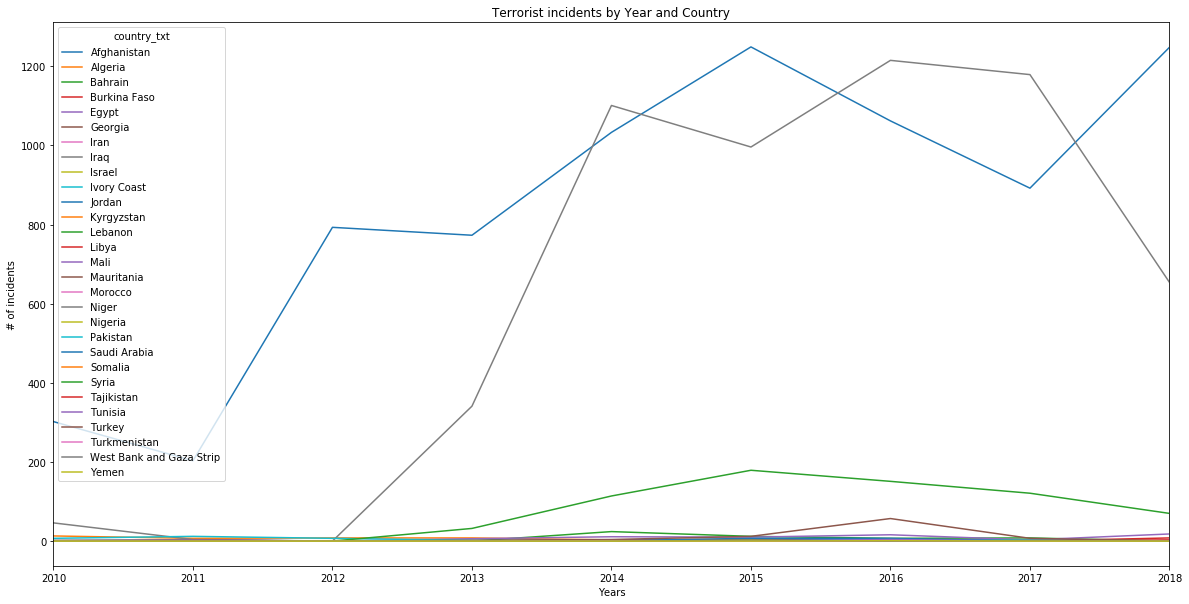

In [53]:
attacks_chart.index = attacks_chart.index.map(int)
attacks_chart.plot(kind = 'line',
            stacked = False,
            figsize = (20,10))
plt.title('Terrorist incidents by Year and Country')
plt.ylabel ('# of incidents')
plt.xlabel ('Years')

plt.show()

In [272]:
attacks_chng = attacks_chart.mean() 
attacks_chng

country_txt
Afghanistan                 839.444444
Algeria                       5.111111
Bahrain                       0.222222
Burkina Faso                  1.555556
Egypt                         0.333333
Georgia                       0.111111
Iran                          0.222222
Iraq                        615.111111
Israel                        0.111111
Ivory Coast                   0.111111
Jordan                        0.666667
Kyrgyzstan                    0.111111
Lebanon                       5.666667
Libya                         0.444444
Mali                          7.555556
Mauritania                    0.444444
Morocco                       0.111111
Niger                         1.222222
Nigeria                       0.111111
Pakistan                      3.777778
Saudi Arabia                  1.666667
Somalia                       0.111111
Syria                        74.111111
Tajikistan                    0.333333
Tunisia                       1.000000
Turkey       

In [ ]:
attacks_chng

# Part 2

In [18]:
aggressive = df_data_1.drop(columns=['eventid','iday','imonth','region', 'city', 'country_txt','latitude', 'longitude', 'attacktype1_txt','nkill'])
aggressive.head()

,iyear,region_txt,gname
0,2010,South Asia,Taliban
1,2010,South Asia,Taliban
2,2010,South Asia,Taliban
3,2010,South Asia,Taliban
4,2010,South Asia,Taliban


In [19]:
aggressive = aggressive.sort_values(by="region_txt", ascending= False)
aggressive

,iyear,region_txt,gname
7865,2016,Sub-Saharan Africa,Al-Qaida in the Islamic Maghreb (AQIM)
7436,2016,Sub-Saharan Africa,Al-Qaida in the Islamic Maghreb (AQIM)
455,2011,Sub-Saharan Africa,Al-Qaida in the Islamic Maghreb (AQIM)
1558,2013,Sub-Saharan Africa,Al-Qaida in the Islamic Maghreb (AQIM)
5253,2015,Sub-Saharan Africa,Al-Qaida in the Islamic Maghreb (AQIM)
13595,2018,Sub-Saharan Africa,Islamic State in the Greater Sahara (ISGS)
7438,2016,Sub-Saharan Africa,Al-Qaida in the Islamic Maghreb (AQIM)
7437,2016,Sub-Saharan Africa,Al-Qaida in the Islamic Maghreb (AQIM)
4150,2014,Sub-Saharan Africa,Al-Qaida in the Islamic Maghreb (AQIM)
12717,2018,Sub-Saharan Africa,Islamic State in the Greater Sahara (ISGS)


In [21]:
incident_count = aggressive['region_txt'].value_counts()
incident_count

South Asia                    7589
Middle East & North Africa    6429
Sub-Saharan Africa             100
Central Asia                     6
Name: region_txt, dtype: int64

In [22]:
incidents = aggressive.groupby(['iyear', 'region_txt'])['gname'].count().unstack(fill_value=0)
incidents.reset_index
incidents.head()

region_txt,Central Asia,Middle East & North Africa,South Asia,Sub-Saharan Africa
iyear,,,,
2010,0,59,309,4
2011,0,14,215,8
2012,0,8,800,1
2013,0,385,775,6
2014,1,1254,1034,11


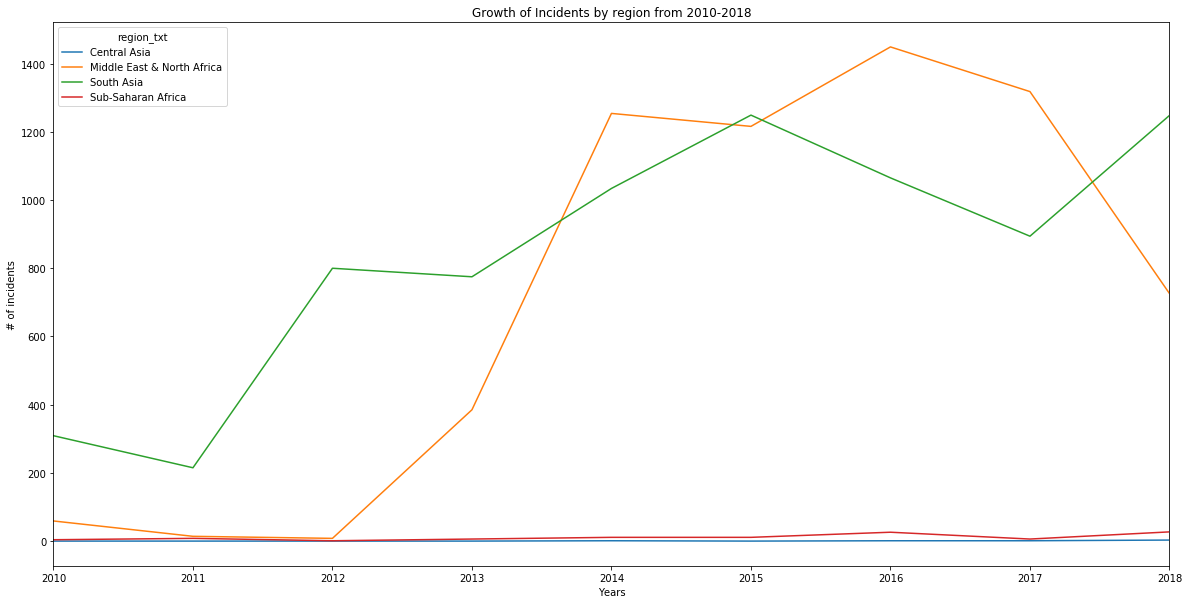

In [26]:
incidents.index = incidents.index.map(int)
incidents.plot(kind = 'line',
            stacked = False,
            figsize = (20,10))
plt.title('Growth of terrorist incidents by region from 2010-2018')
plt.ylabel ('# of incidents')
plt.xlabel ('Years')

plt.show()

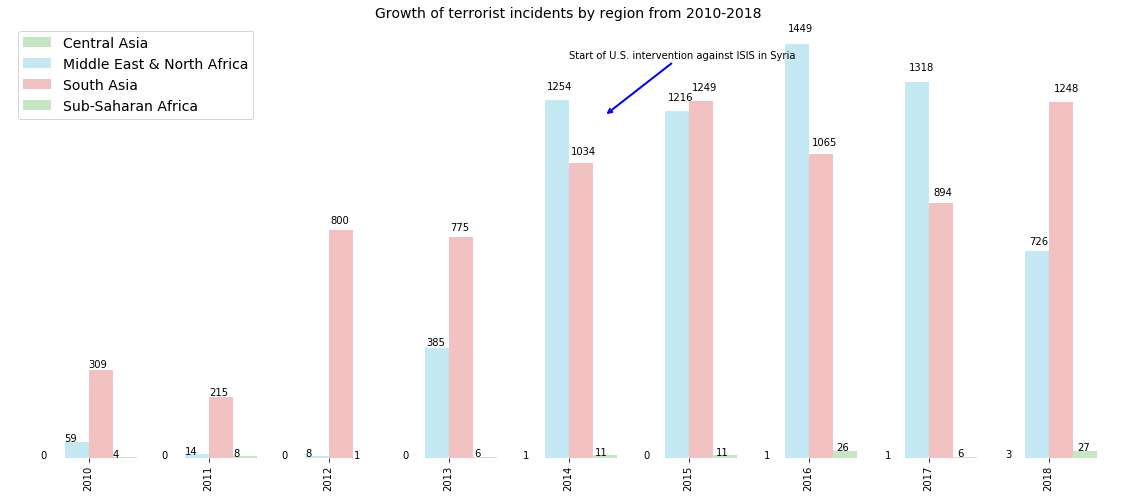

In [48]:
ax= incidents.plot(kind='bar', alpha=0.35, figsize=(20,8), width=.8, color=['#5cb85c', '#5bc0de', '#d9534f'])

ax.set_title('Growth of terrorist incidents by region from 2010-2018', fontsize = 14)
ax.set_ylabel('# of incidents')
ax.set_xlabel('Years')
ax.legend(fontsize=14)
ax.set_frame_on(False)
ax.set_xlabel(False).set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_xticklabels(('2010', '2011', '2012', '2013', '2014', '2015','2016','2017','2018'))


plt.annotate('Start of U.S. intervention against ISIS in Syria',                      # s: str. will leave it blank for no text
             xy=(4.3, 1200),             # place head of the arrow at point (year 2012 , pop 70)
            xytext=(4, 1400),         # place base of the arrow at point (year 2008 , pop 20)
xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )


for p in ax.patches:
    ax.annotate(str(p.get_height()) + '', (p.get_x() * 1.005, p.get_height() * 1.03))

plt.show()

# Part 3

In [192]:
df = df_data_1.drop(columns=['eventid','imonth','iday','country_txt','region','region_txt','city','latitude','longitude','attacktype1_txt'])
df

,iyear,gname,nkill,count
0,2010,6,4.0,7589
1,2010,6,4.0,7589
2,2010,6,0.0,7589
3,2010,6,6.0,7589
4,2010,6,0.0,7589
5,2010,1,0.0,2
6,2010,6,0.0,7589
7,2010,6,4.0,7589
8,2010,6,7.0,7589
9,2010,6,4.0,7589


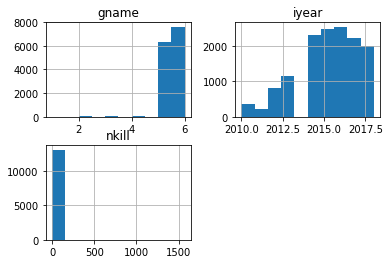

In [193]:
viz = df[['gname','nkill','iyear']]
viz.hist()
plt.show()

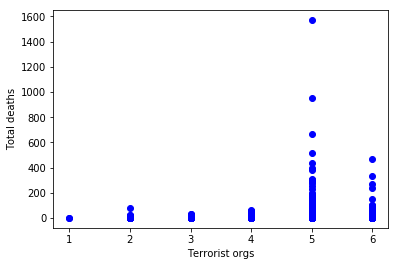

In [216]:
plt.scatter(df.gname, df.nkill,  color='blue')
plt.xlabel("Terrorist orgs")
plt.ylabel("Total deaths")
plt.show()

In [217]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

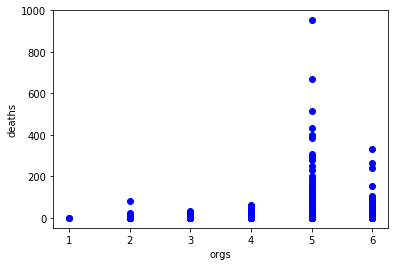

In [200]:
plt.scatter(train.gname, train.nkill,  color='blue')
plt.xlabel("orgs")
plt.ylabel("deaths")
plt.show()

In [213]:
df = df.drop(columns=['count'])

In [214]:
df = df.fillna(df.mean())
df

,iyear,gname,nkill
0,2010,6,4.000000
1,2010,6,4.000000
2,2010,6,0.000000
3,2010,6,6.000000
4,2010,6,0.000000
5,2010,1,0.000000
6,2010,6,0.000000
7,2010,6,4.000000
8,2010,6,7.000000
9,2010,6,4.000000


In [218]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['gname']])
train_y = np.asanyarray(train[['nkill']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-1.42]]
Intercept:  [13.6]


Text(0, 0.5, 'nkill')

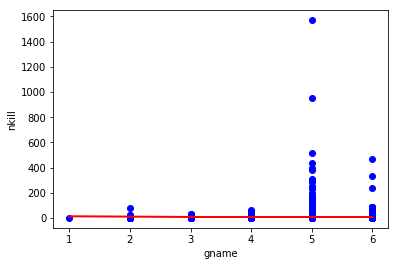

In [219]:
plt.scatter(train.gname, train.nkill,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("gname")
plt.ylabel("nkill")

In [220]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['gname']])
test_y = np.asanyarray(test[['nkill']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 5.92
Residual sum of squares (MSE): 329.83
R2-score: -414.94
